# **KNN from scratch**

# Introduction

 k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems

# algorithm

We can implement a KNN model by following steps:
.Load the data

.Initialise the value of k

.For getting the predicted class, iterate from 1 to total number of training data points

.Calculate the distance between test data and each row of training data. Here we will use Euclidean .distance as our distance metric since it’s the most popular method.

.Sort the calculated distances in ascending order based on distance values

.Get top k rows from the sorted array

.Get the most frequent class of these rows

.Return the predicted class

.find accuracy

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
import random
import csv
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1.loading the data set
df = pd.read_csv('seeds')# read the csv data 
attributes = ['area','perimeter','compactness','length','width','asymmetry','groove','type']
df.columns = attributes 
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,type
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


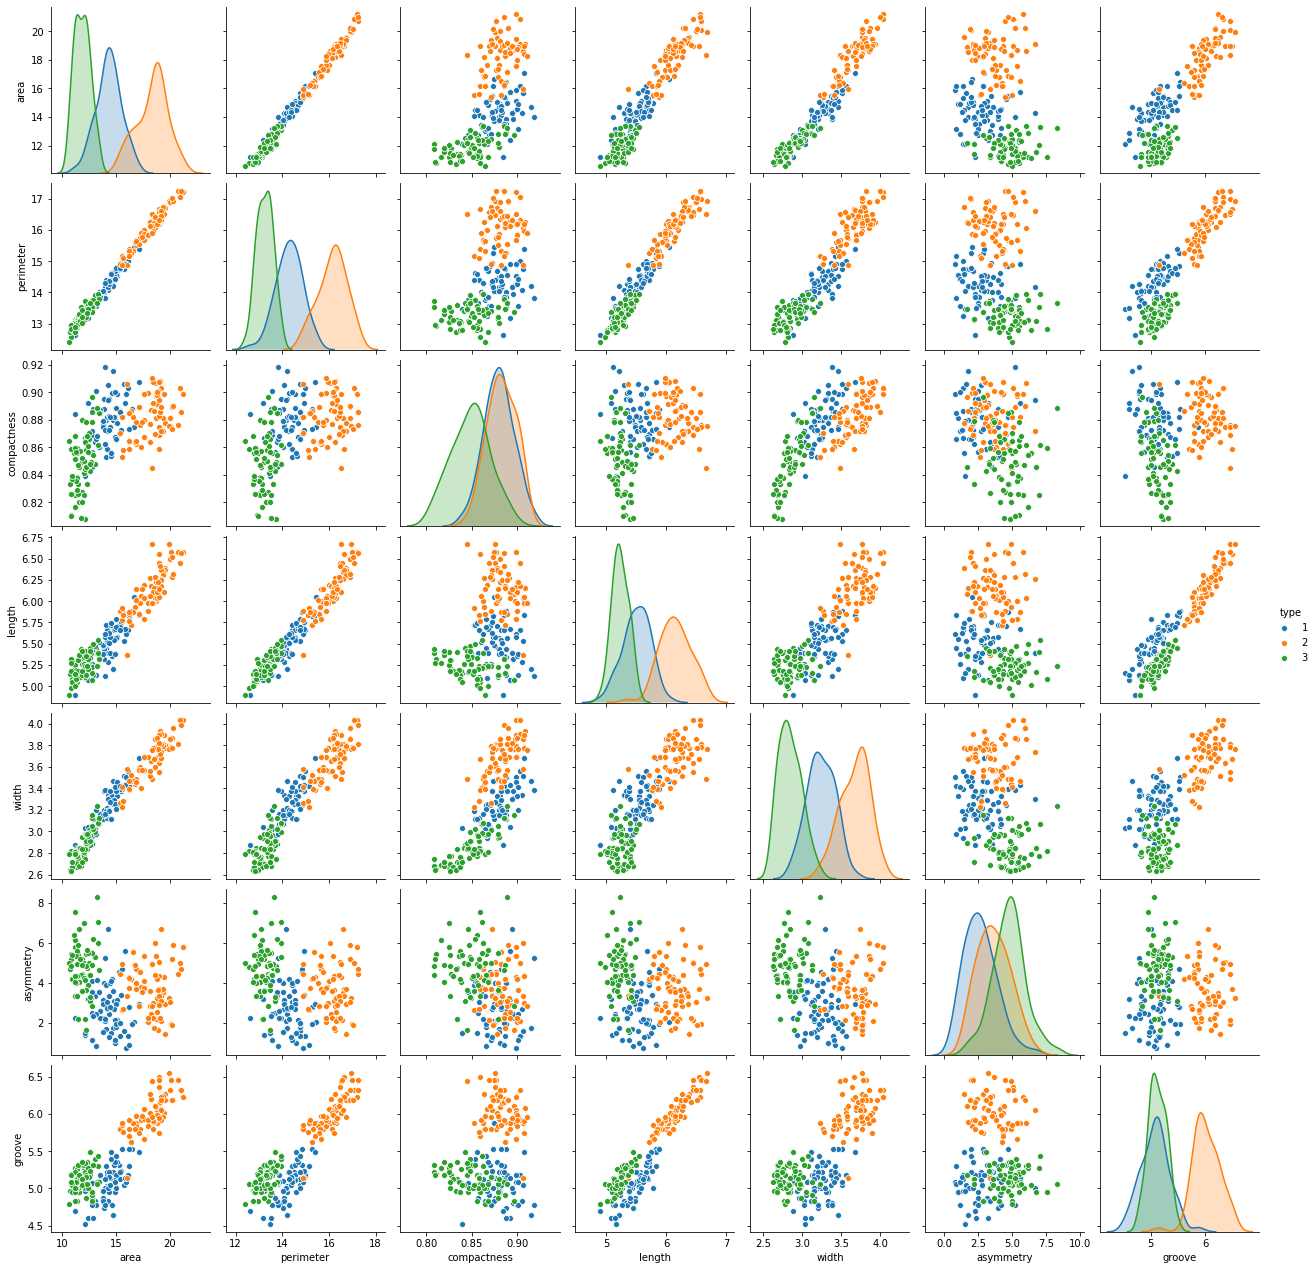

In [3]:
#visuavalisation of dataset
import seaborn as sns
sns.pairplot(data=df, hue='type')

In [4]:
# Splitting data into 70:30 train:test ratio
from sklearn.model_selection import train_test_split
df_X=df.iloc[:,:7]
df_Y=df.iloc[:,7]
X_train,X_test,Y_train,Y_test=train_test_split(df_X,df_Y,test_size=0.3,random_state=33)        

In [5]:
# Changing the index of the records to sequential
X_train.index=range(len(X_train))
Y_train.index=range(len(X_train))
X_test.index=range(len(X_test))
Y_test.index=range(len(Y_test))

In [6]:
# Function to return the list of distances of the test records from train records
def distNeighbours(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        euclideanDistance=0
        for j in range(len(X_train.columns)):   
                euclideanDistance+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        distance.append((euclideanDistance,i,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance
# Output is the most frequent class among K nearest neighbours
def predictOutputCategorical(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        votes={}
        for j in i:
            if j[-1] in votes.keys():
                votes[j[-1]]=votes[j[-1]]+1
            else:
                votes[j[-1]]=1
        responses.append(sorted(votes,key=votes.get,reverse=True)[0])
    return responses
# Output is the mean of the K nearest neighbours
def predictOutputNumeric(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        mean=0
        for j in i:
            mean+=j[-1]
        mean=mean/K
        responses.append(mean)
    return responses
# Accuarcy of the categorical predictions 
def getAccuracyCategorical(actual,predicted):
    correct=0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            correct+=1
    return round((correct/len(actual))*100,2)
# Accuarcy of the numerical predictions
def getAccuracyNumeric(actual,predicted):
    error=0
    for i in range(len(predicted)):
        error+=pow((actual[i]-predicted[i]),2)
    error=error/len(predicted)-1
    return error
# Predict species
k=5
output=predictOutputCategorical(X_train,Y_train,X_test,k)
getAccuracyCategorical(Y_test,output)

91.67

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import math
import operator

data = pd.read_csv('seeds')
# Define a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)
# Define our KNN model
def knn(trainingSet, testInstance, k):
    distances = {}
    sort = {}
    length = testInstance.shape[1]
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1), reverse=True)
    neighbors = []
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    # End of Step
    classVotes = {}
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
testSet = [[13.74,14.05,0.8744,5.482,3.114,2.932,4.825]]
test = pd.DataFrame(testSet)
# Setting number of neighbors = 5
k = 5 
result,neigh = knn(data, test, k) 
# Predicted class 
print('\nPredicted class of the datapoint = ',result)
# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)    


Predicted class of the datapoint =  2.0

Nearest Neighbours of the datapoints =  [83, 108, 84, 72, 114]
